# Aula 07 (01/09/2023)

# Problema do Caminho Mínimo

O problema do caminho mínimo se trata de um problema onde há um conjunto de pontos ou nós, um conjunto de arcos ligando esses nós, e um custo associado a percorrer cada arco, onde se deseja encontrar a sequência de arcos que forma o caminho de menor custo entre um nó inicial e um nó final.

- Dados:  
    I. Nó de origem  
    II. Nó de destino  
    III. Peso dos arcos (distância, tempo, tipo de estrada, etc.)  
- Objetivo: minimizar o somatório do peso dos arcos 

O problema do caminho mínimo é um problema de fluxo. Nele existem três tipos de nós:

- nó de origem: arcos apenas saem desse nó;  

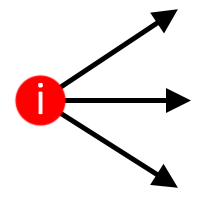

- nó intermediário: arcos chegam e saem desse nó;

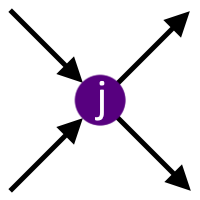

- nó de destino: arcos apenas chegam a esse nó.

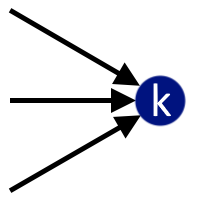

As variáveis de decisão são $x_{ij}$, onde $i$ é o nó inicial do arco e $j$ é o nó final do arco. $x_{12}$, por exemplo, corresponde ao arco que sai do nó 1 e chega ao nó 2. $x_{ij}$ assume valor 1 quando faz parte de um determinado caminho, e 0 quando não. Isso implica nos diferentes tipos de nós serem associados a diferentes "saldos" de arcos:

- nó de origem: $\sum_{j=1}^n -x_{ij}=-1,\ i=\text{nó de origem}$  
- nó intermediário: $\sum x_{ij}-\sum x_{jk}=0,\ j=\text{nó intermediário}$  
- nó destino: $\sum_{k=1}^{m} x_{kw}=1,\ w=\text{nó de destino}$ 

## Exemplo

Seja o seguinte problema do caminho mínimo:

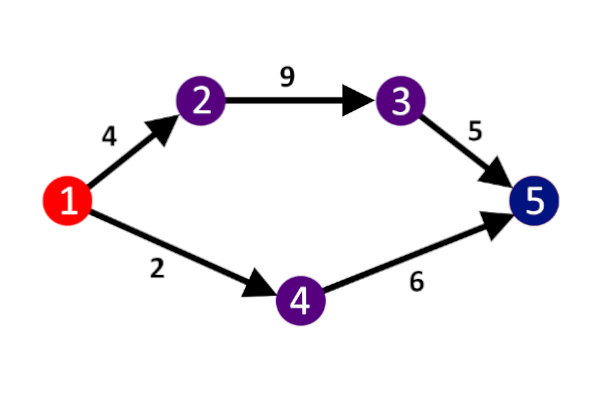

Ele pode ser expresso na forma de um problema de programação linear:

$\text{Maximizar}\ 4X_{12}+2X_{14}+9X_{23}+6X_{45}+5X_{35}$  
$\text{Sujeito a}
    \begin{cases}
        -X_{12}-X_{14} = -1\ \text{(nó de origem)}\\
        \left. \begin{array}{l}
            X_{12}-X_{23} = 0\ \\
            X_{14}-X_{45} = 0\ \\
            X_{23}-X_{35} = 0\ \\
        \end{array}\right\}\ \text{(nós intermediários)} \\
         X_{35}+X_{45} = 1\ \text{(nó de destino)}\\
        X_{12},\ X_{14},\ X_{23},\ X_{45},\ X_{35} \ge 0
    \end{cases}$  

# Exemplo em `Julia`

O arquivo `dados-cam-min.csv` visto em aula descreve o seguinte problema de caminho mínimo:

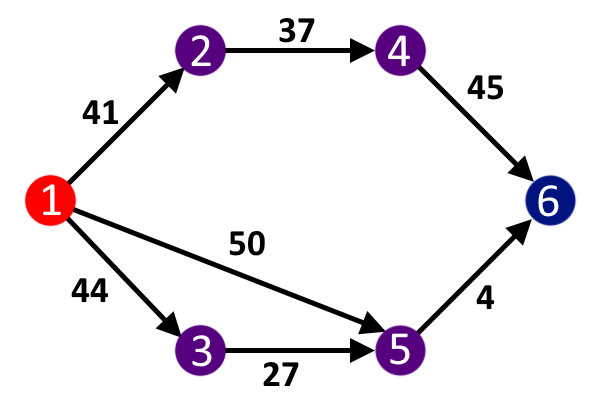

Resolvendo com `Julia`:

In [1]:
# Bibliotecas a serem usadas
using JuMP, GLPK, DelimitedFiles

In [2]:
# Número de nós e seus tipos
nodes = 1:6
b=[-1,0,0,0,0,1]

# Inícios e fins dos 7 caminhos
start_node = [1,1,1,2,3,4,5]
end_node = [2,3,5,4,5,6,6]

# Custos associados aos caminhos
c=[41, 44, 50, 37, 27, 45, 4]
u=[Inf, Inf, Inf, Inf, Inf, Inf, Inf]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(start_node) )
c_dict = Dict(links .=> c)
u_dict = Dict(links .=> u)

links

((1, 2), (1, 3), (1, 5), (2, 4), (3, 5), (4, 6), (5, 6))

In [3]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis (caminhos)
@variable(model, 0<= x[link in links] <= u_dict[link])

# Função objetivo 
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Custos dos 
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Min 41 x[(1, 2)] + 44 x[(1, 3)] + 50 x[(1, 5)] + 37 x[(2, 4)] + 27 x[(3, 5)] + 45 x[(4, 6)] + 4 x[(5, 6)]
Subject to
 -x[(1, 2)] - x[(1, 3)] - x[(1, 5)] == -1
 x[(1, 2)] - x[(2, 4)] == 0
 x[(1, 3)] - x[(3, 5)] == 0
 x[(2, 4)] - x[(4, 6)] == 0
 x[(1, 5)] + x[(3, 5)] - x[(5, 6)] == 0
 x[(4, 6)] + x[(5, 6)] == 1
 x[(1, 2)] >= 0
 x[(1, 3)] >= 0
 x[(1, 5)] >= 0
 x[(2, 4)] >= 0
 x[(3, 5)] >= 0
 x[(4, 6)] >= 0
 x[(5, 6)] >= 0



In [4]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Custo mínimo
println(obj)

# Caminho do custo mínimo
println("Função Objetivo: FO=", obj)
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

54.0
Função Objetivo: FO=54.0
Valor de x(1, 2) = 0.0
Valor de x(1, 3) = 0.0
Valor de x(1, 5) = 1.0
Valor de x(2, 4) = 0.0
Valor de x(3, 5) = 0.0
Valor de x(4, 6) = 0.0
Valor de x(5, 6) = 1.0


Ou seja, o caminho de custo mínimo é:

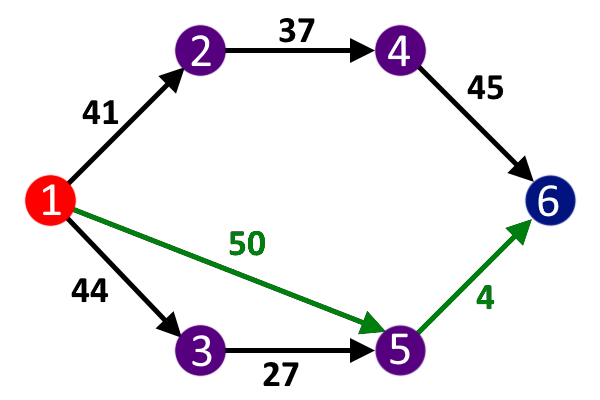

# Exercício 1

Seja o seguinte problema do caminho mínimo:

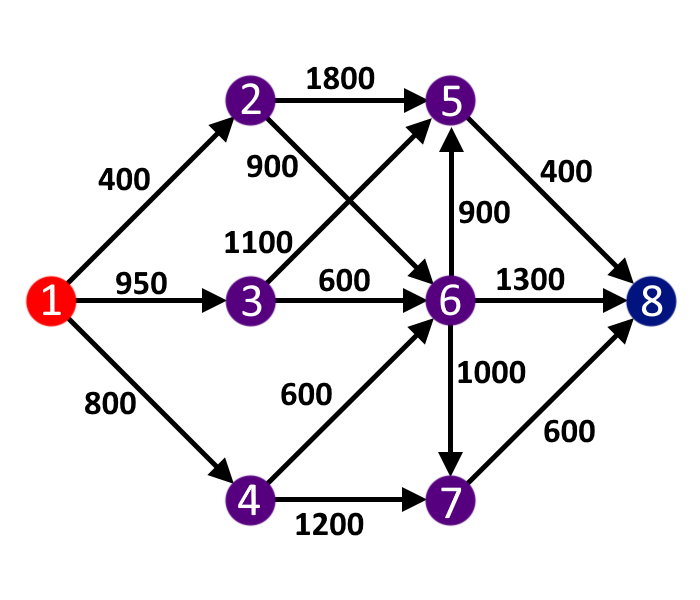

Resolvendo com `Julia`:

In [5]:
# Número de nós e seus tipos
nodes = 1:8
b=[-1,0,0,0,0,0,0,1]

# Inícios e fins dos 14 caminhos
start_node = [1,1,1, 2,2, 3,3, 4,4, 5, 6,6,6, 7]
end_node = [2,3,4, 5,6, 5,6, 6,7, 8, 5,7,8, 8]

# Custos associados aos caminhos
c=[400,950,800, 1800,900, 1100,600, 600,1200, 400, 900,1000,1300, 600]
u=[Inf,Inf,Inf, Inf,Inf, Inf,Inf, Inf,Inf, Inf, Inf,Inf,Inf, Inf]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(start_node) )
c_dict = Dict(links .=> c)
u_dict = Dict(links .=> u)
    
links

((1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 5), (3, 6), (4, 6), (4, 7), (5, 8), (6, 5), (6, 7), (6, 8), (7, 8))

In [6]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis (caminhos)
@variable(model, 0<= x[link in links] <= u_dict[link])

# Função objetivo 
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Custos dos 
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Min 400 x[(1, 2)] + 950 x[(1, 3)] + 800 x[(1, 4)] + 1800 x[(2, 5)] + 900 x[(2, 6)] + 1100 x[(3, 5)] + 600 x[(3, 6)] + 600 x[(4, 6)] + 1200 x[(4, 7)] + 400 x[(5, 8)] + 900 x[(6, 5)] + 1000 x[(6, 7)] + 1300 x[(6, 8)] + 600 x[(7, 8)]
Subject to
 -x[(1, 2)] - x[(1, 3)] - x[(1, 4)] == -1
 x[(1, 2)] - x[(2, 5)] - x[(2, 6)] == 0
 x[(1, 3)] - x[(3, 5)] - x[(3, 6)] == 0
 x[(1, 4)] - x[(4, 6)] - x[(4, 7)] == 0
 x[(2, 5)] + x[(3, 5)] - x[(5, 8)] + x[(6, 5)] == 0
 x[(2, 6)] + x[(3, 6)] + x[(4, 6)] - x[(6, 5)] - x[(6, 7)] - x[(6, 8)] == 0
 x[(4, 7)] + x[(6, 7)] - x[(7, 8)] == 0
 x[(5, 8)] + x[(6, 8)] + x[(7, 8)] == 1
 x[(1, 2)] >= 0
 x[(1, 3)] >= 0
 x[(1, 4)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(4, 6)] >= 0
 x[(4, 7)] >= 0
 x[(5, 8)] >= 0
 x[(6, 5)] >= 0
 x[(6, 7)] >= 0
 x[(6, 8)] >= 0
 x[(7, 8)] >= 0



In [7]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Custo mínimo
println(obj)

# Caminho do custo mínimo
println("Função Objetivo: FO=", obj)
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

2450.0
Função Objetivo: FO=2450.0
Valor de x(1, 2) = 0.0
Valor de x(1, 3) = 1.0
Valor de x(1, 4) = 0.0
Valor de x(2, 5) = 0.0
Valor de x(2, 6) = 0.0
Valor de x(3, 5) = 1.0
Valor de x(3, 6) = 0.0
Valor de x(4, 6) = 0.0
Valor de x(4, 7) = 0.0
Valor de x(5, 8) = 1.0
Valor de x(6, 5) = 0.0
Valor de x(6, 7) = 0.0
Valor de x(6, 8) = 0.0
Valor de x(7, 8) = 0.0


Ou seja, o caminho ótimo é:

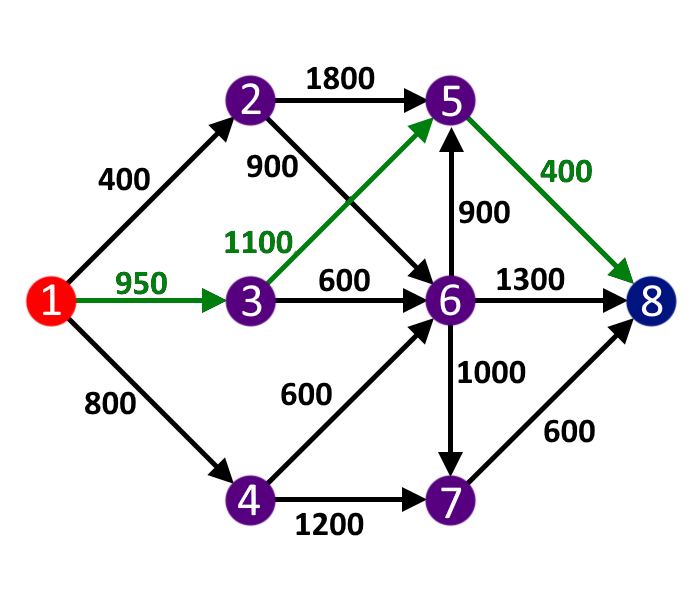

# Exercício 2

Considere o seguinte problema de caminho mínimo:

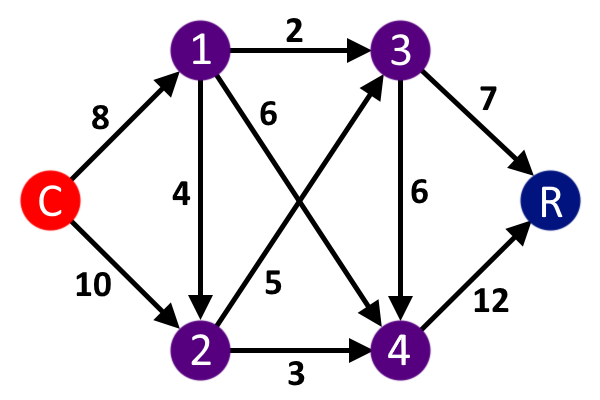

Resolvendo com `Julia`:

In [8]:
# Nós e suas restrições (considere 5 o nó inicial e 6 o final)
nodes = 1:6
b=[0,0,0,0,-1,1]

# Inícios e fins dos caminhos
start_node = [5,5, 1,1,1, 2,2, 3,3, 4]
end_node = [1,2, 2,3,4, 3,4, 4,6, 6]

# Custos associados aos caminhos
c=[8,10, 4,2,6, 5,3, 6,7, 12]
u=[Inf,Inf, Inf,Inf,Inf, Inf,Inf, Inf,Inf, Inf]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(start_node) )
c_dict = Dict(links .=> c)
u_dict = Dict(links .=> u)

Dict{Tuple{Int64, Int64}, Float64} with 10 entries:
  (2, 4) => Inf
  (1, 2) => Inf
  (5, 2) => Inf
  (5, 1) => Inf
  (1, 3) => Inf
  (3, 6) => Inf
  (3, 4) => Inf
  (1, 4) => Inf
  (4, 6) => Inf
  (2, 3) => Inf

In [9]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis (caminhos)
@variable(model, 0<= x[link in links] <= u_dict[link])

# Função objetivo 
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Custos dos 
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Min 8 x[(5, 1)] + 10 x[(5, 2)] + 4 x[(1, 2)] + 2 x[(1, 3)] + 6 x[(1, 4)] + 5 x[(2, 3)] + 3 x[(2, 4)] + 6 x[(3, 4)] + 7 x[(3, 6)] + 12 x[(4, 6)]
Subject to
 x[(5, 1)] - x[(1, 2)] - x[(1, 3)] - x[(1, 4)] == 0
 x[(5, 2)] + x[(1, 2)] - x[(2, 3)] - x[(2, 4)] == 0
 x[(1, 3)] + x[(2, 3)] - x[(3, 4)] - x[(3, 6)] == 0
 x[(1, 4)] + x[(2, 4)] + x[(3, 4)] - x[(4, 6)] == 0
 -x[(5, 1)] - x[(5, 2)] == -1
 x[(3, 6)] + x[(4, 6)] == 1
 x[(5, 1)] >= 0
 x[(5, 2)] >= 0
 x[(1, 2)] >= 0
 x[(1, 3)] >= 0
 x[(1, 4)] >= 0
 x[(2, 3)] >= 0
 x[(2, 4)] >= 0
 x[(3, 4)] >= 0
 x[(3, 6)] >= 0
 x[(4, 6)] >= 0



In [10]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Custo mínimo
println(obj)

# Caminho do custo mínimo
println("Função Objetivo: FO=", obj)
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

17.0
Função Objetivo: FO=17.0
Valor de x(5, 1) = 1.0
Valor de x(5, 2) = 0.0
Valor de x(1, 2) = 0.0
Valor de x(1, 3) = 1.0
Valor de x(1, 4) = 0.0
Valor de x(2, 3) = 0.0
Valor de x(2, 4) = 0.0
Valor de x(3, 4) = 0.0
Valor de x(3, 6) = 1.0
Valor de x(4, 6) = 0.0


Ou seja, o caminho ótimo é:

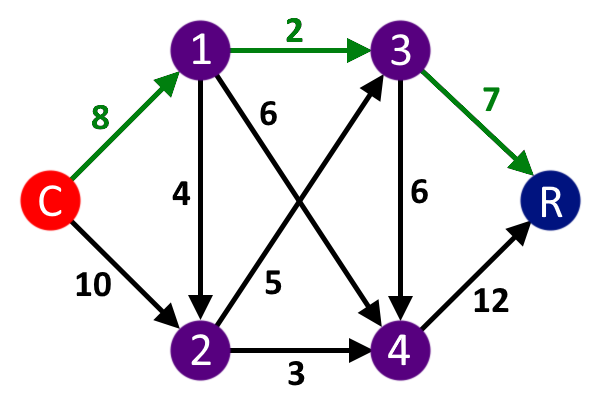